In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [4]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
features['Price']=targets

In [7]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


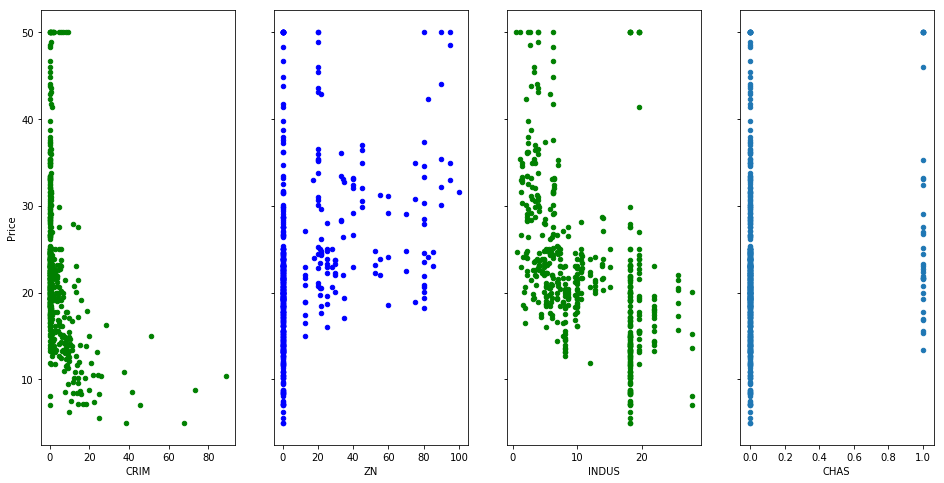

In [10]:
fig, axs = plt.subplots(1, 4, sharey=True)
features.plot(kind='scatter', x='CRIM', y='Price', color='g', ax=axs[0], figsize=(16, 8))
features.plot(kind='scatter', x='ZN', y='Price',color='b', ax=axs[1])
features.plot(kind='scatter', x='INDUS', y='Price',color='g', ax=axs[2])
features.plot(kind='scatter', x='CHAS', y='Price', ax=axs[3])

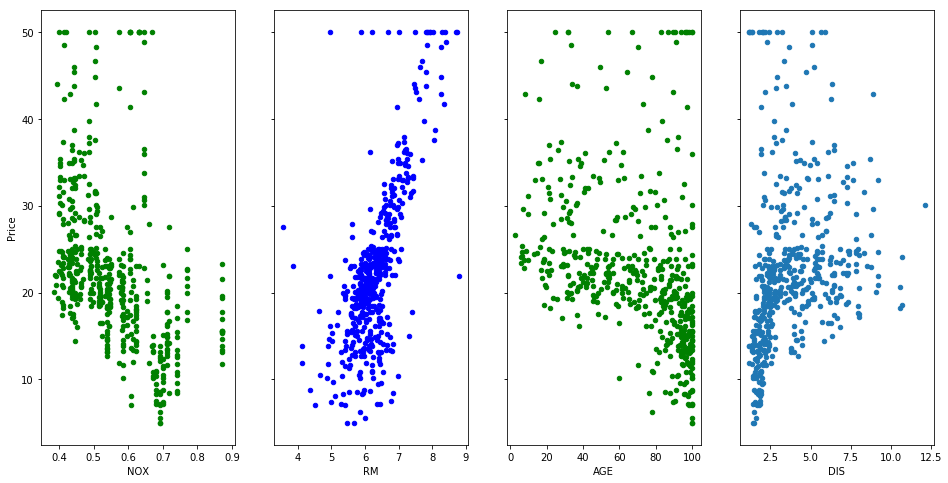

In [11]:
fig, axs = plt.subplots(1, 4, sharey=True)
features.plot(kind='scatter', x='NOX', y='Price', color='g', ax=axs[0], figsize=(16, 8))
features.plot(kind='scatter', x='RM', y='Price',color='b', ax=axs[1])
features.plot(kind='scatter', x='AGE', y='Price',color='g', ax=axs[2])
features.plot(kind='scatter', x='DIS', y='Price', ax=axs[3])

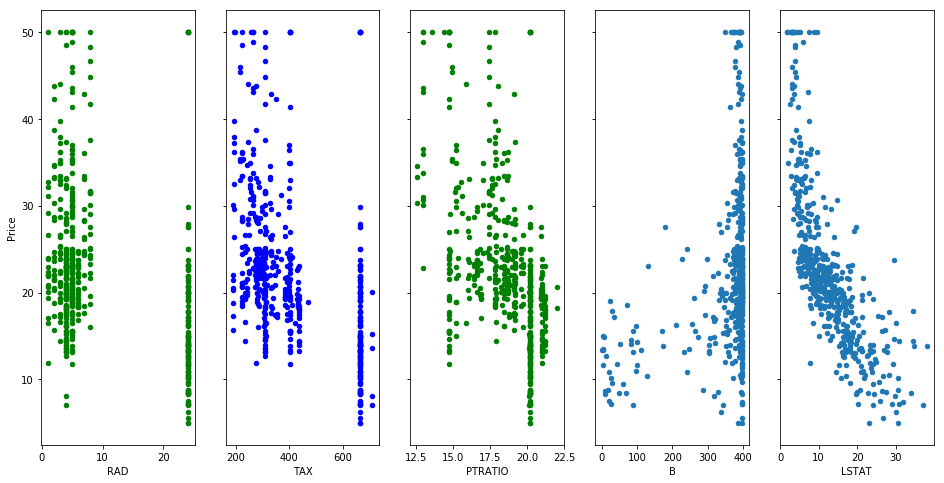

In [12]:
fig, axs = plt.subplots(1, 5, sharey=True)
features.plot(kind='scatter', x='RAD', y='Price', color='g', ax=axs[0], figsize=(16, 8))
features.plot(kind='scatter', x='TAX', y='Price',color='b', ax=axs[1])
features.plot(kind='scatter', x='PTRATIO', y='Price',color='g', ax=axs[2])
features.plot(kind='scatter', x='B', y='Price', ax=axs[3])
features.plot(kind='scatter', x='LSTAT', y='Price', ax=axs[4])

In [13]:
X=features.iloc[:,:-1].values
y=features.iloc[:,13:].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([22.48, 30.14, 18.46, 22.98, 16.28, 21.7 , 21.13, 16.11, 20.64,
       19.82, 20.03, 20.61,  8.68, 21.49, 18.31, 22.85, 19.52,  9.02,
       46.62, 15.53, 24.23, 25.91, 14.41, 23.39, 14.34, 14.62, 21.49,
       14.4 , 19.37, 21.07, 20.96, 23.61, 31.97, 19.87, 14.02, 14.89,
       32.88, 18.85, 21.49, 24.3 , 19.99, 28.84, 45.89, 19.26, 22.74,
       13.35, 15.  , 24.62, 18.48, 28.13, 19.79, 33.71, 16.36, 24.99,
       42.17, 22.04, 14.56, 29.78, 22.51, 22.11, 25.15, 33.73, 26.43,
       18.15, 25.68, 15.95, 12.69, 23.74, 28.22, 15.25, 21.04, 27.28,
       10.99, 19.94, 22.44,  7.57, 19.94, 45.74, 11.68, 13.12, 21.1 ,
       14.8 , 18.17,  9.05, 20.06, 26.66, 15.59, 23.58, 23.34, 17.59,
       21.6 ,  7.06, 19.61, 18.74, 25.12, 19.92, 44.39, 15.45, 12.51,
       15.66, 20.79, 24.19])

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_pred, y_test))

2.890704168232248